# Offender Recidivism

## Introduction

During my time getting my Bachelor's in Computer Science, I picked up a minor in Criminal Justice and finished it last semester. During my last class for my minor, we did some data analytics in R regarding all types of crime data. We never got to predicting data, only visualizing and making bivariate regressions. While I'm done completing my minor, this topic is still interesting to me, and I'd like to see if I could use models to predict whether offenders reoffended or not within 3 years.

For project 2, I'm going to be looking at offender recidivism and attempting to create a model to predict recidivism given crime characteristics and release information of real offenders provided by the State of Iowa. This dataset only includes a small portion of characteristics about offenders so I'm interested to see the accuracy of which it makes predictions, as anyone who has studied any criminal justice knows, crime is more complicated than just statistics.

## The Question

The problem that I would like to solve this project is:
<ul>
    <li>Can it be predicted if an offender will return to prison within 3 years?</li>
</ul>

## The Data

The data I'm using for this project is from the State of Iowa, found through this Kaggle post <a href="https://www.kaggle.com/datasets/slonnadube/recidivism-for-offenders-released-from-prison?resource=download">here.</a>

The data itself captures characteristics about offenders, their original crimes, and whether they returned to prison within 3 years or not.

I'm just using one of the csv files, as the second one is redudant and has a few more columns I'm not interested in.

This data set includes a column at the end with a 1 or 0 value to indicate whether an offender has returned to prison or not (1 meaning they returned, 0 they have not).

In [1]:
import pandas as pd
import numpy as np

In [2]:
recidivism_df = pd.read_csv("3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv")

In [3]:
recidivism_df

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release Type,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,White - Hispanic,25-34,C Felony,Violent,Murder/Manslaughter,NaN,Discharged End of Sentence,Discharged End of Sentence,Yes,0
26016,2015,2018,White - Non-Hispanic,25-34,D Felony,Property,Vandalism,5JD,Paroled to Detainer - Out of State,Paroled to Detainer,No,0
26017,2015,2018,Black - Non-Hispanic,Under 25,Aggravated Misdemeanor,Violent,Other Violent,1JD,Discharged End of Sentence,Discharged End of Sentence,Yes,0
26018,2015,2018,White - Non-Hispanic,Under 25,D Felony,Drug,Other Drug,5JD,Parole,Parole,No,0


## Pre-Processing

Luckily with this dataset, there's not much pre-processing to do, but I'm still going to inspect my data and remove unnecessary columns. I'm keeping Release type: Paroled to Detainder united versus Release Type because it's more concise in the rows and combines similar types of release.

In [4]:
recidivism_cleaned_df = recidivism_df.drop(['Fiscal Year Released', 'Recidivism Reporting Year', 
                                            'Main Supervising District', 'Release Type', 
                                            'Part of Target Population'], axis=1)

In [5]:
#checking for null values
recidivism_cleaned_df.isna().sum()

Race - Ethnicity                               30
Age At Release                                  3
Convicting Offense Classification               0
Convicting Offense Type                         0
Convicting Offense Subtype                      0
Release type: Paroled to Detainder united    1762
Recidivism - Return to Prison numeric           0
dtype: int64

In a frame with just over 26,000 rows, I'm fine with dropping all the rows with these null values. I want to include all of these rows in the model, and if it had full data it'll be able to train and perform better.

In [6]:
recidivism_cleaned_df = recidivism_cleaned_df.dropna(axis=0)

In [7]:
recidivism_cleaned_df

,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release type: Paroled to Detainder united,Recidivism - Return to Prison numeric
0,White - Non-Hispanic,Under 25,D Felony,Violent,Assault,Parole,1
1,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,Parole,1
2,White - Non-Hispanic,25-34,D Felony,Property,Burglary,Parole,1
3,White - Non-Hispanic,55 and Older,C Felony,Drug,Trafficking,Parole,1
4,Black - Non-Hispanic,25-34,D Felony,Drug,Trafficking,Parole,1
...,...,...,...,...,...,...,...
26015,White - Hispanic,25-34,C Felony,Violent,Murder/Manslaughter,Discharged End of Sentence,0
26016,White - Non-Hispanic,25-34,D Felony,Property,Vandalism,Paroled to Detainer,0
26017,Black - Non-Hispanic,Under 25,Aggravated Misdemeanor,Violent,Other Violent,Discharged End of Sentence,0
26018,White - Non-Hispanic,Under 25,D Felony,Drug,Other Drug,Parole,0


In [8]:
recidivism_cleaned_df.isna().sum()

Race - Ethnicity                             0
Age At Release                               0
Convicting Offense Classification            0
Convicting Offense Type                      0
Convicting Offense Subtype                   0
Release type: Paroled to Detainder united    0
Recidivism - Return to Prison numeric        0
dtype: int64

In [9]:
recidivism_cleaned_df.dtypes

Race - Ethnicity                             object
Age At Release                               object
Convicting Offense Classification            object
Convicting Offense Type                      object
Convicting Offense Subtype                   object
Release type: Paroled to Detainder united    object
Recidivism - Return to Prison numeric         int64
dtype: object

In [10]:
#"Age At Release" column has an unneccasary space at the end, I'm going to rename and fix that.
recidivism_cleaned_df = recidivism_cleaned_df.rename(columns={"Age At Release ": "Age At Release"})

In [11]:
recidivism_cleaned_df['Age At Release']

0            Under 25
1        55 and Older
2               25-34
3        55 and Older
4               25-34
             ...     
26015           25-34
26016           25-34
26017        Under 25
26018        Under 25
26019           35-44
Name: Age At Release, Length: 24225, dtype: object

Now that our data is cleaned, it's time to start understanding it.

## Data Understanding / Visualization

Before I get into modeling the data for classification, I want to visualize the data and see a few things. Apologies for the excessive circles but I like pie charts.

The first will be how many offenders in this dataset reoffended in the first place.

In [12]:
import matplotlib.pyplot as plt

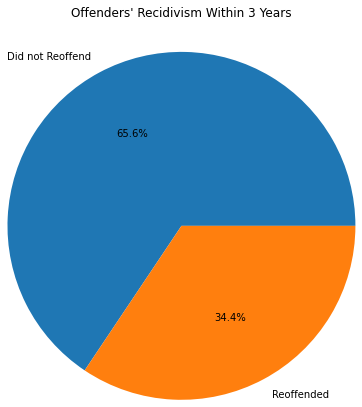

In [13]:
labels = ['Did not Reoffend', 'Reoffended']
data = recidivism_cleaned_df['Recidivism - Return to Prison numeric'].value_counts()
plt.pie(data, labels=labels, autopct='%1.1f%%', radius=2)
plt.title('Offenders\' Recidivism Within 3 Years', pad=100)
plt.show()

Just from this pie graph, we can see that around 1/3 of offenders reoffended within 3 years.

Let's now look at what types of crimes the reoffenders initially committed before they were released. For this, I'm just looking at the top 6 classifications, as I've discovered after trying to get a good look at this graph there are a few classifications with less than 1% of reoffenders that aren't common in the dataset.

In [14]:
reoffender_df = recidivism_cleaned_df[recidivism_cleaned_df['Recidivism - Return to Prison numeric'] != 0]
reoffender_df['Recidivism - Return to Prison numeric'].value_counts()

1    8331
Name: Recidivism - Return to Prison numeric, dtype: int64

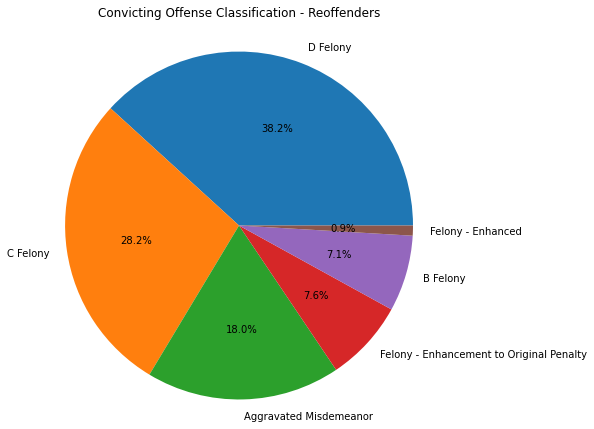

In [15]:
#first looking at classification of crime (felony, misdemeanor, etc)
data = reoffender_df['Convicting Offense Classification'].value_counts().nlargest(6)
labels = data.index
plt.pie(data, labels=labels, autopct='%1.1f%%', radius=2)
plt.title('Convicting Offense Classification - Reoffenders', pad=100)
plt.show()

The common theme for reoffenders seems to be mostly a Felony. Let's explore those who did not reoffend and their initial convictions.

In [16]:
no_reoffender_df = recidivism_cleaned_df[recidivism_cleaned_df['Recidivism - Return to Prison numeric'] != 1]
no_reoffender_df['Recidivism - Return to Prison numeric'].value_counts()

0    15894
Name: Recidivism - Return to Prison numeric, dtype: int64

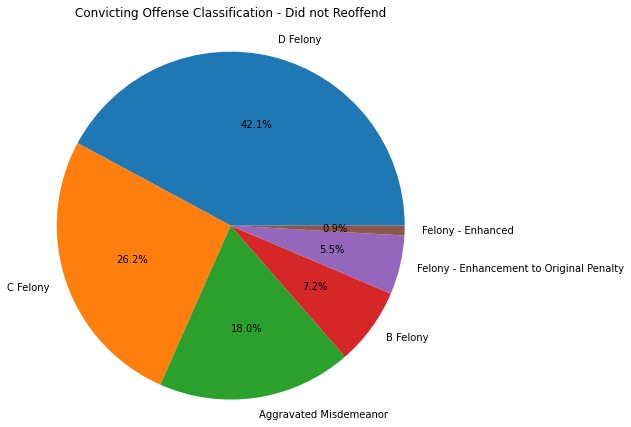

In [17]:
data = no_reoffender_df['Convicting Offense Classification'].value_counts().nlargest(6)
labels = data.index
plt.pie(data, labels=labels, autopct='%1.1f%%', radius=2)
plt.title('Convicting Offense Classification - Did not Reoffend', pad=100)
plt.show()

Surprisingly, it's a very similar chart. Perhaps we need to look into other aspects.

Now I'm going to investigate release type - this would be answering a question regarding the type of release that an offender had. Does more supervision (aka Parole release versus finishing a sentence) stop an offender from reoffending?

I'll use my split dataframes to show reoffender vs no reoffender.

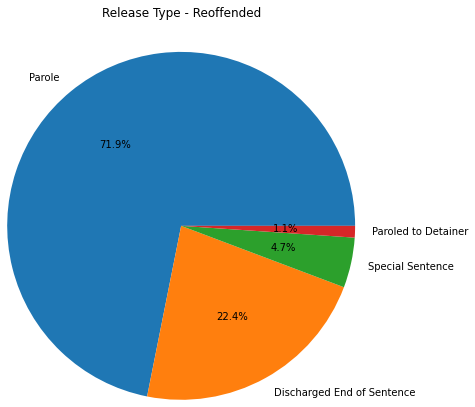

In [18]:
data = reoffender_df['Release type: Paroled to Detainder united'].value_counts()
labels = data.index
plt.pie(data, labels=labels, autopct='%1.1f%%', radius=2)
plt.title('Release Type - Reoffended', pad=100)
plt.show()

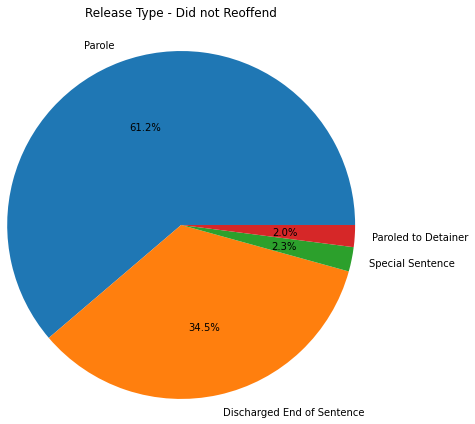

In [19]:
data = no_reoffender_df['Release type: Paroled to Detainder united'].value_counts()
labels = data.index
plt.pie(data, labels=labels, autopct='%1.1f%%', radius=2)
plt.title('Release Type - Did not Reoffend', pad=100)
plt.show()

This data is interesting to me. It seems for reoffenders, more of them were released initally on Parole than being discharged at the end of their sentence. This leads to a question that came up quite a bit in my minor studies - does being supervised more make you reoffend more, or do officers just notice more crimes when someone is under supervision? This data can't answer that, but it'll be useful for the models.

Let's look at Age ranges now for reoffending vs not reoffending.

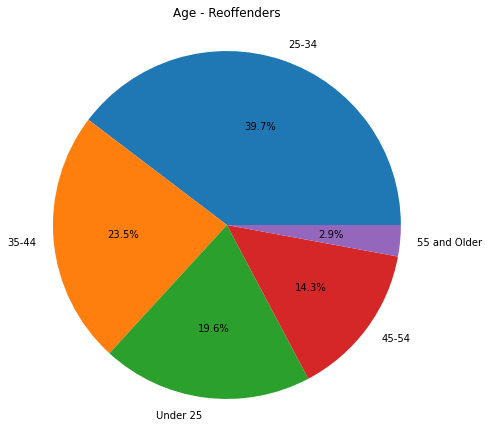

In [21]:
data = reoffender_df['Age At Release'].value_counts()
labels = data.index
plt.pie(data, labels=labels, autopct='%1.1f%%', radius=2)
plt.title('Age - Reoffenders', pad=100)
plt.show()

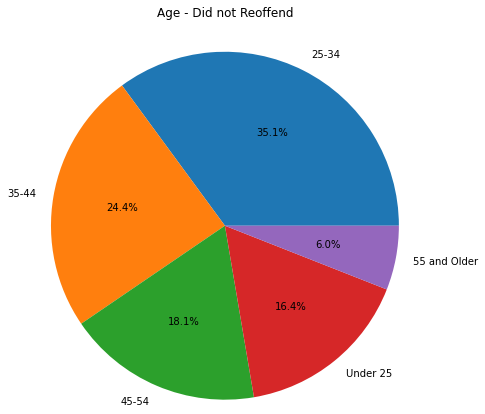

In [23]:
data = no_reoffender_df['Age At Release'].value_counts()
labels = data.index
plt.pie(data, labels=labels, autopct='%1.1f%%', radius=2)
plt.title('Age - Did not Reoffend', pad=100)
plt.show()

For both of these age graphs, the younger age groups seemed to shrink with not reoffending versus reoffending, while the older age groups grew in the "did not reoffend" chart. Maybe this is a trend the models will pick up on.

The last visualizations I'm going to make pre-modeling is over race & ethnicity and reoffending. 

/var/folders/yt/dh3sw_w52pz_ghjs7qjznxcm0000gn/T/ipykernel_1056/3583283130.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top4_df_copy = top4_df_copy.append(others)


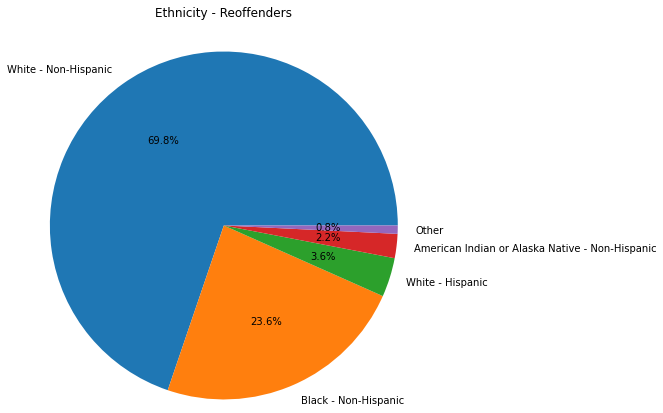

In [62]:
top4_df = reoffender_df['Race - Ethnicity'].value_counts().sort_values(ascending=False)
top4_df_copy = top4_df[:4].copy()
others = top4_df[4:].sum()
others = pd.Series(data=others, index=["Other"])
top4_df_copy = top4_df_copy.append(others)

data = top4_df_copy
labels = data.index
plt.pie(data, labels=labels, autopct='%1.1f%%', radius=2)
plt.title('Ethnicity - Reoffenders', pad=100)
plt.show()

/var/folders/yt/dh3sw_w52pz_ghjs7qjznxcm0000gn/T/ipykernel_1056/3724922183.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top4_df_copy = top4_df_copy.append(others)


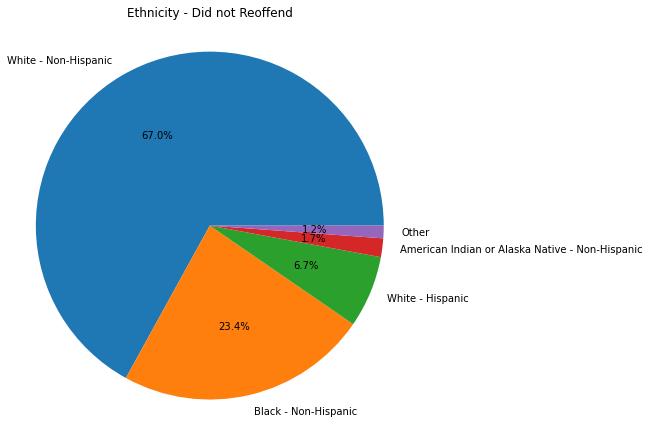

In [64]:
top4_df = no_reoffender_df['Race - Ethnicity'].value_counts().sort_values(ascending=False)
top4_df_copy = top4_df[:4].copy()
others = top4_df[4:].sum()
others = pd.Series(data=others, index=["Other"])
top4_df_copy = top4_df_copy.append(others)

data = top4_df_copy
labels = data.index
plt.pie(data, labels=labels, autopct='%1.1f%%', radius=2)
plt.title('Ethnicity - Did not Reoffend', pad=100)
plt.show()

The data doesn't have much of a difference with Race and Ethnicity. I'm curious to see how the model will handle this column. 

With all of these visuals giving us an idea of some differences between reoffenders and non-reoffenders, it's time to hand it off to the models and see if they can make some predictions. It is worth to be noted that there aren't traits with huge differences between reoffenders and non-reoffenders, so it'll be interesting to see if the models are able to pick up on clues that simple pie charts can't and if they are making accurate predictions.

## Modeling

Now that I've looked at some of the data and visualized some key characteristics, I want to use models to predict our data.

The models I'm going to be using are:
<ul>
    <li>Decision Tree</li>
    <li>Random Forest</li>
    <li>K-Nearest Neighbor</li>
    <li>Logistic Regression</li>
</ul>

I'm choosing these models because I want a variety of algorithms to see if one predicts this data better than others, especially with the data separating the two categories being so similar to each other.

The first model I'm going to be using is a simple Decision Tree. A Decision Tree is a simple algorithm making true or false statements from a root node down to leaf nodes to decide where to classify data. I want to see how accurate of decisions it makes with a singular tree before moving on to utilizing Random Forest with many decision trees.

To start, I'm going to make dummy variables out of our String variables (which is most of them!)

In [66]:
#checking which variables need dummies
recidivism_cleaned_df.dtypes

Race - Ethnicity                             object
Age At Release                               object
Convicting Offense Classification            object
Convicting Offense Type                      object
Convicting Offense Subtype                   object
Release type: Paroled to Detainder united    object
Recidivism - Return to Prison numeric         int64
dtype: object

In [70]:
recidivism_cleaned_df_dummies = pd.get_dummies(recidivism_cleaned_df, columns = ['Race - Ethnicity', 'Age At Release',
                                                                                'Convicting Offense Classification',
                                                                                'Convicting Offense Type',
                                                                                'Convicting Offense Subtype',
                                                                                'Release type: Paroled to Detainder united'])
recidivism_cleaned_df_dummies

,Recidivism - Return to Prison numeric,Race - Ethnicity_American Indian or Alaska Native - Hispanic,Race - Ethnicity_American Indian or Alaska Native - Non-Hispanic,Race - Ethnicity_Asian or Pacific Islander - Hispanic,Race - Ethnicity_Asian or Pacific Islander - Non-Hispanic,Race - Ethnicity_Black -,Race - Ethnicity_Black - Hispanic,Race - Ethnicity_Black - Non-Hispanic,Race - Ethnicity_N/A -,Race - Ethnicity_White -,...,Convicting Offense Subtype_Stolen Property,Convicting Offense Subtype_Theft,Convicting Offense Subtype_Traffic,Convicting Offense Subtype_Trafficking,Convicting Offense Subtype_Vandalism,Convicting Offense Subtype_Weapons,Release type: Paroled to Detainder united_Discharged End of Sentence,Release type: Paroled to Detainder united_Parole,Release type: Paroled to Detainder united_Paroled to Detainer,Release type: Paroled to Detainder united_Special Sentence
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
26017,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
26018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now time to split X and y (features from target)

In [72]:
X = recidivism_cleaned_df_dummies.drop(columns = ['Recidivism - Return to Prison numeric'])
y = recidivism_cleaned_df_dummies['Recidivism - Return to Prison numeric']

In [73]:
X

,Race - Ethnicity_American Indian or Alaska Native - Hispanic,Race - Ethnicity_American Indian or Alaska Native - Non-Hispanic,Race - Ethnicity_Asian or Pacific Islander - Hispanic,Race - Ethnicity_Asian or Pacific Islander - Non-Hispanic,Race - Ethnicity_Black -,Race - Ethnicity_Black - Hispanic,Race - Ethnicity_Black - Non-Hispanic,Race - Ethnicity_N/A -,Race - Ethnicity_White -,Race - Ethnicity_White - Hispanic,...,Convicting Offense Subtype_Stolen Property,Convicting Offense Subtype_Theft,Convicting Offense Subtype_Traffic,Convicting Offense Subtype_Trafficking,Convicting Offense Subtype_Vandalism,Convicting Offense Subtype_Weapons,Release type: Paroled to Detainder united_Discharged End of Sentence,Release type: Paroled to Detainder united_Parole,Release type: Paroled to Detainder united_Paroled to Detainer,Release type: Paroled to Detainder united_Special Sentence
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
26016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
26017,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [74]:
y

0        1
1        1
2        1
3        1
4        1
        ..
26015    0
26016    0
26017    0
26018    0
26019    0
Name: Recidivism - Return to Prison numeric, Length: 24225, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [76]:
#splitting with 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [77]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((19380, 65), (19380,), (4845, 65), (4845,))

In [80]:
#Creating the tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [86]:
clf.score(X_test, y_test)

0.6553147574819401

Our one decision tree comes back with a score of 65% accuracy, which isn't great, but one thing to remember about this data is that there are many other factors not included in this dataset that could contribute to a person reoffending. I'm not going to visualize this tree because there are too many dummy variables and decisions for it to plot out (my laptop is also not very happy about it) - but I'll come back to the tree and analyze the results versus my other classification algorithms used.

Next, I'm going to upgrade this singular decision tree algorithm into a Random Forest and see if that yields better results. A Random Forest, in its simplest description, is just a bunch of decision trees working together to classify data. I'm going to use 100 decision trees.

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [104]:
regressor = RandomForestClassifier(n_estimators=100)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [108]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77      3208
           1       0.49      0.26      0.34      1637

    accuracy                           0.66      4845
   macro avg       0.59      0.56      0.55      4845
weighted avg       0.63      0.66      0.62      4845



Looking at our accuracy alone to compare to the singular decision tree, it didn't change much (66% accuracy here!). Adding more trees doesn't change the accuracy of the model. This is showing that decision trees are not a great method at predicting a reoffender with the criteria we have. 

Next, I'm going to implement K-Nearest Neighbor on my data, 5 neighbors, then I will increase to 10 neighbors to see if there is a difference. K-Nearest Neighbor takes data and plots it in a dimensional plane to spot clusters of data. It then takes new data and places it in that plane and takes the K-nearest neighbors (5 and 10 in these models) to decide which category the data is most similar to.

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [116]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [117]:
knn_model.score(X_test, y_test)

0.6181630546955624

The score for accuracy in K Nearest Neighbor is performing slightly under the Random Forest / Decision Tree at 61%. Let's increase neighbors to 10 and see if there's a difference.

In [118]:
knn_model = KNeighborsClassifier(n_neighbors=10)

In [119]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [120]:
knn_model.score(X_test, y_test)

0.6454076367389061

Let's print out more metrics for a clearer view.

In [130]:
predictions = knn_model.predict(X_test)

In [131]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77      3208
           1       0.44      0.18      0.25      1637

    accuracy                           0.65      4845
   macro avg       0.56      0.53      0.51      4845
weighted avg       0.60      0.65      0.59      4845



It increased the accuracy by around 3%, so not a super significant improvement.

The last model type I'm going to be using is a Logistic Regression. A Logistic Regression is an algorithm that uses a logarithmic graph to plot out the probability of data being in one category or the other. 

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
log = LogisticRegression()

In [124]:
log.fit(X_train, y_train)

/Users/jilldahlem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
log.score(X_test, y_test)

0.6619195046439629

In [132]:
predictions = log.predict(X_test)

In [133]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79      3208
           1       0.50      0.08      0.13      1637

    accuracy                           0.66      4845
   macro avg       0.58      0.52      0.46      4845
weighted avg       0.61      0.66      0.57      4845



Even with logistic regression, the accuracy is sticking around 66%.

## Evaluation / Discussion

So, after running through four different models of classification algorithms, I think it's clear these models don't have the capability of accurately predicting reoffenders. The best performing model that I used was Logistic Regression and Random Forest, both sitting at an accuracy of 66%. This means that 1/3 of its predictions were incorrect. Now, predicting reoffenders isn't always a life-or-death necessary function but it could help to prevent future crimes.

Let's just look at the Logistic Regression's confusion matrix to see if it predicted more false positive or false negatives.

In [134]:
confusion_matrix(y_test, predictions)

array([[3084,  124],
       [1514,  123]])

So, for the Logistic Regression model, it actually predicted more false positives than false negatives (1514 vs 124). This means that the model believed that more offenders who did not reoffend actually reoffended than predicting that offenders who did reoffend but in actuality did not.

If a model like this were in use today, it would likely lead to more resources being used on offenders to prevent future reoffending. It could be seen as a good thing to be overpredicting reoffenders because in reality there are less reoffenders than predicted and more resources could be available for first time offenders, but it could also be seen as a bad thing because it could mean more supervision for first time offenders who don't actually have a need for it.

Now, for why the models didn't perform that great? It's likely because there weren't huge significant differences between reoffenders and non-reoffenders as shown in the visualizations. There are likely other characteristics in play that were not represented in this dataset that could separate the two categories of offenders. I think this is something that the criminal justice system as a whole struggles with because if there were a sure-fire way of predicting reoffenders, it'd be in use and be working on preventing reoffenses in the future. But it's easy to forget that the statistics and data here represents real people who live in different circumstances and live completely different lives than each other that can't be captured by a data column.

### Sources

<ul>
    <li>https://www.kaggle.com/datasets/slonnadube/recidivism-for-offenders-released-from-prison</li>
    <li>https://www.stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn</li>
    <li>https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a</li>
    <li>https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn</li>
</ul>